In [26]:
import cv2
import dlib
import numpy as np
import os
import imutils
import matplotlib.pyplot as plt

In [27]:
os.chdir("D:\Documents\Semester 6\Deep Learning and Neural Networks\Project\Datasets\MaskTest - Review")
path = "D:\Documents\Semester 6\Deep Learning and Neural Networks\Project\Datasets\MaskTest - Review\4.png"

color_blue = (239,207,137)

In [28]:
img= cv2.imread("D:\Documents\Semester 6\Deep Learning and Neural Networks\Project\Datasets\MaskTest - Review\JeffBezos.jfif")
img = imutils.resize(img, width = 500)
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img)

[[[251 243 242]
  [248 240 240]
  [249 242 241]
  ...
  [ 95  91  87]
  [101  98  93]
  [106 102  98]]

 [[249 242 238]
  [251 243 240]
  [249 242 238]
  ...
  [100  94  92]
  [101  95  93]
  [111 106 103]]

 [[251 242 237]
  [250 241 236]
  [252 243 238]
  ...
  [105  96  96]
  [102  93  93]
  [122 113 113]]

 ...

 [[ 42  40  36]
  [ 43  39  38]
  [ 43  37  38]
  ...
  [ 46  44  43]
  [ 52  50  49]
  [ 53  51  50]]

 [[ 44  41  37]
  [ 42  37  36]
  [ 46  40  41]
  ...
  [ 48  46  45]
  [ 49  47  46]
  [ 58  56  55]]

 [[ 49  44  41]
  [ 44  39  38]
  [ 42  36  37]
  ...
  [ 44  42  41]
  [ 52  50  49]
  [ 51  49  48]]]


In [29]:
detector = dlib.get_frontal_face_detector()
faces = detector(gray, 1)

#print(faces)
#print("Number of faces detected: ", len(faces))

In [30]:
p = "D:\Documents\Semester 6\Deep Learning and Neural Networks\Project\Datasets\shape_predictor_68_face_landmarks.dat"
predictor = dlib.shape_predictor(p)

for face in faces:
    landmarks = predictor(gray, face)

204
243
[[ 79 193]
 [420 311]]


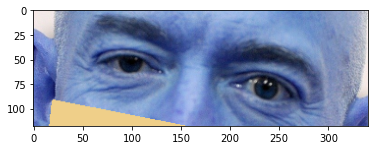

In [31]:
choice1 = color_blue

points = []
for i in range(1, 16):
    point = [landmarks.part(i).x, landmarks.part(i).y]
    points.append(point)

mask_c = [((landmarks.part(29).x), (landmarks.part(29).y))]

fmask_c = points + mask_c
fmask_c = np.array(fmask_c, dtype=np.int32)
img2 = cv2.polylines(img, [fmask_c], True, choice1, thickness=2, lineType=cv2.LINE_8)
img3 = cv2.fillPoly(img2, [fmask_c], choice1, lineType=cv2.LINE_AA)

plt.imshow(img3)


if(landmarks.part(20).y>landmarks.part(25).y):
    pointA1=[((landmarks.part(1).x-20),(landmarks.part(20).y)-50)]
#lif(landmarks.part(20).y is None):
#    pointA1=[((landmarks.part(1).x-20),(landmarks.part(25).y)-50)]
#elif(landmarks.part(25).y is None):
#    pointA1=[((landmarks.part(1).x-20),(landmarks.part(20).y)-50)]
else:
    pointA1=[((landmarks.part(1).x)-20,(landmarks.part(25).y)-50)]
pointB1=[((landmarks.part(16).x)+20,(landmarks.part(31).y)-40)]

cropWindow2=pointA1+pointB1
cropWindow2=np.array(cropWindow2,dtype=np.int32)

print(landmarks.part(20).y)
print(landmarks.part(25).y)
print(cropWindow2)


crop_img2=img3[cropWindow2[0][1]:cropWindow2[1][1],cropWindow2[0][0]:cropWindow2[1][0]]
plt.imshow(crop_img2)

#  Output
#outputNameofImage = "D:\Documents\Semester 6\Deep Learning and Neural Networks\Project\Datasets\MaskTest - Review\Masked\Test-Crop.jpg"
#print("Saving output image to", outputNameofImage)
#cv2.imwrite(outputNameofImage, img3)
